# Tablet sales price prediction

## Data Loading

In [2]:
# Importing dataset via kaggle

!kaggle datasets download -d siddiquifaiznaeem/tablet-dataset-2024

Dataset URL: https://www.kaggle.com/datasets/siddiquifaiznaeem/tablet-dataset-2024
License(s): CC0-1.0
  0%|                                               | 0.00/11.5k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 11.5k/11.5k [00:00<00:00, 33.0MB/s]


In [3]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Tablet sales price prediction/tablet-dataset-2024.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Tablet sales price prediction')
zip_ref.close()

## Exploratory Data Analysis

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('tablet_cleaned_2024.csv')

In [6]:
df.head()

,Unnamed: 0,name,brand,rating,price,processor_brand,num_processor,processor_speed,ram,memory_inbuilt,...,primary_front_camera,secondry_front_camera,primary_rear_camera,secondry_rear_camera,os_brand,version,memory_card_upto,sim,is_5G,is_wifi
0,0,Xiaomi Pad 6S Pro,Xiaomi,4.65,49990,Snapdragon,8.0,3.2,8.0,256.0,...,32.0,NaN,50.0,2.0,Android,14.0,NaN,NaN,not_available,Wi-Fi
1,1,Samsung Galaxy Tab A9 Plus Tablet,Samsung,4.75,21829,Snapdragon,8.0,2.2,4.0,64.0,...,5.0,NaN,8.0,NaN,Android,13.0,1TB,NaN,5G,Wi-Fi
2,2,Lenovo Xiaoxin Pad Pro 12.7,Lenovo,4.60,18499,Snapdragon,8.0,3.2,8.0,128.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi
3,3,Xiaomi Pad 6 Tablet (8GB RAM + 256GB),Xiaomi,4.00,28999,Snapdragon,8.0,3.2,8.0,256.0,...,8.0,NaN,13.0,NaN,Android,13.0,NaN,NaN,not_available,Wi-Fi
4,4,Lenovo Xiaoxin Pad Pro 12.7 (8GB RAM + 256GB),Lenovo,4.70,20499,Snapdragon,8.0,3.2,8.0,256.0,...,13.0,NaN,8.0,NaN,NaN,NaN,1TB,Single Sim,5G,Wi-Fi


In [7]:
df.shape

(390, 29)

In [8]:
df.size

11310

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 390 entries, 0 to 389
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             390 non-null    int64  
 1   name                   390 non-null    object 
 2   brand                  390 non-null    object 
 3   rating                 390 non-null    float64
 4   price                  390 non-null    int64  
 5   processor_brand        379 non-null    object 
 6   num_processor          379 non-null    float64
 7   processor_speed        325 non-null    float64
 8   ram                    365 non-null    float64
 9   memory_inbuilt         387 non-null    float64
 10  battery_capacity       359 non-null    float64
 11  charger                208 non-null    float64
 12  charging               229 non-null    object 
 13  display_size_inches    389 non-null    float64
 14  pixel                  384 non-null    object 
 15  resolu

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,390.0,194.500000,112.727548,0.000,97.2500,194.50,291.75,389.00
rating,390.0,4.372436,0.230770,3.950,4.1625,4.40,4.55,4.75
price,390.0,35638.182051,39981.181667,3199.000,11999.0000,19990.00,39999.00,230740.00
num_processor,379.0,7.411609,1.408392,1.000,8.0000,8.00,8.00,8.00
processor_speed,325.0,2.250831,0.543917,1.000,2.0000,2.20,2.40,3.30
ram,365.0,5.880921,3.507519,0.512,3.0000,4.00,8.00,20.00
memory_inbuilt,387.0,170.201550,293.737733,4.000,32.0000,128.00,128.00,2000.00
battery_capacity,359.0,7340.670557,2798.233458,2800.000,5100.0000,7250.00,8320.00,32000.00
charger,208.0,30.500000,18.320681,10.000,18.0000,20.00,45.00,120.00
display_size_inches,389.0,10.369769,1.645094,6.900,10.1000,10.40,11.00,14.60


In [13]:
df.isnull().sum()

Unnamed: 0                 0
name                       0
brand                      0
rating                     0
price                      0
processor_brand           11
num_processor             11
processor_speed           65
ram                       25
memory_inbuilt             3
battery_capacity          31
charger                  182
charging                 161
display_size_inches        1
pixel                      6
resolution_width           6
resolution_height          6
ppi                        6
frequency_display_hz     286
primary_front_camera       4
secondry_front_camera    380
primary_rear_camera        5
secondry_rear_camera     316
os_brand                 261
version                  263
memory_card_upto          67
sim                      146
is_5G                     43
is_wifi                    0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
df.nunique()

Unnamed: 0               390
name                     382
brand                     43
rating                    17
price                    231
processor_brand           27
num_processor              5
processor_speed           33
ram                       13
memory_inbuilt            10
battery_capacity          74
charger                   20
charging                   1
display_size_inches       47
pixel                     52
resolution_width          34
resolution_height         37
ppi                       85
frequency_display_hz       3
primary_front_camera      12
secondry_front_camera      2
primary_rear_camera        9
secondry_rear_camera       9
os_brand                   5
version                   15
memory_card_upto          11
sim                        3
is_5G                      2
is_wifi                    1
dtype: int64

## Data Visualization

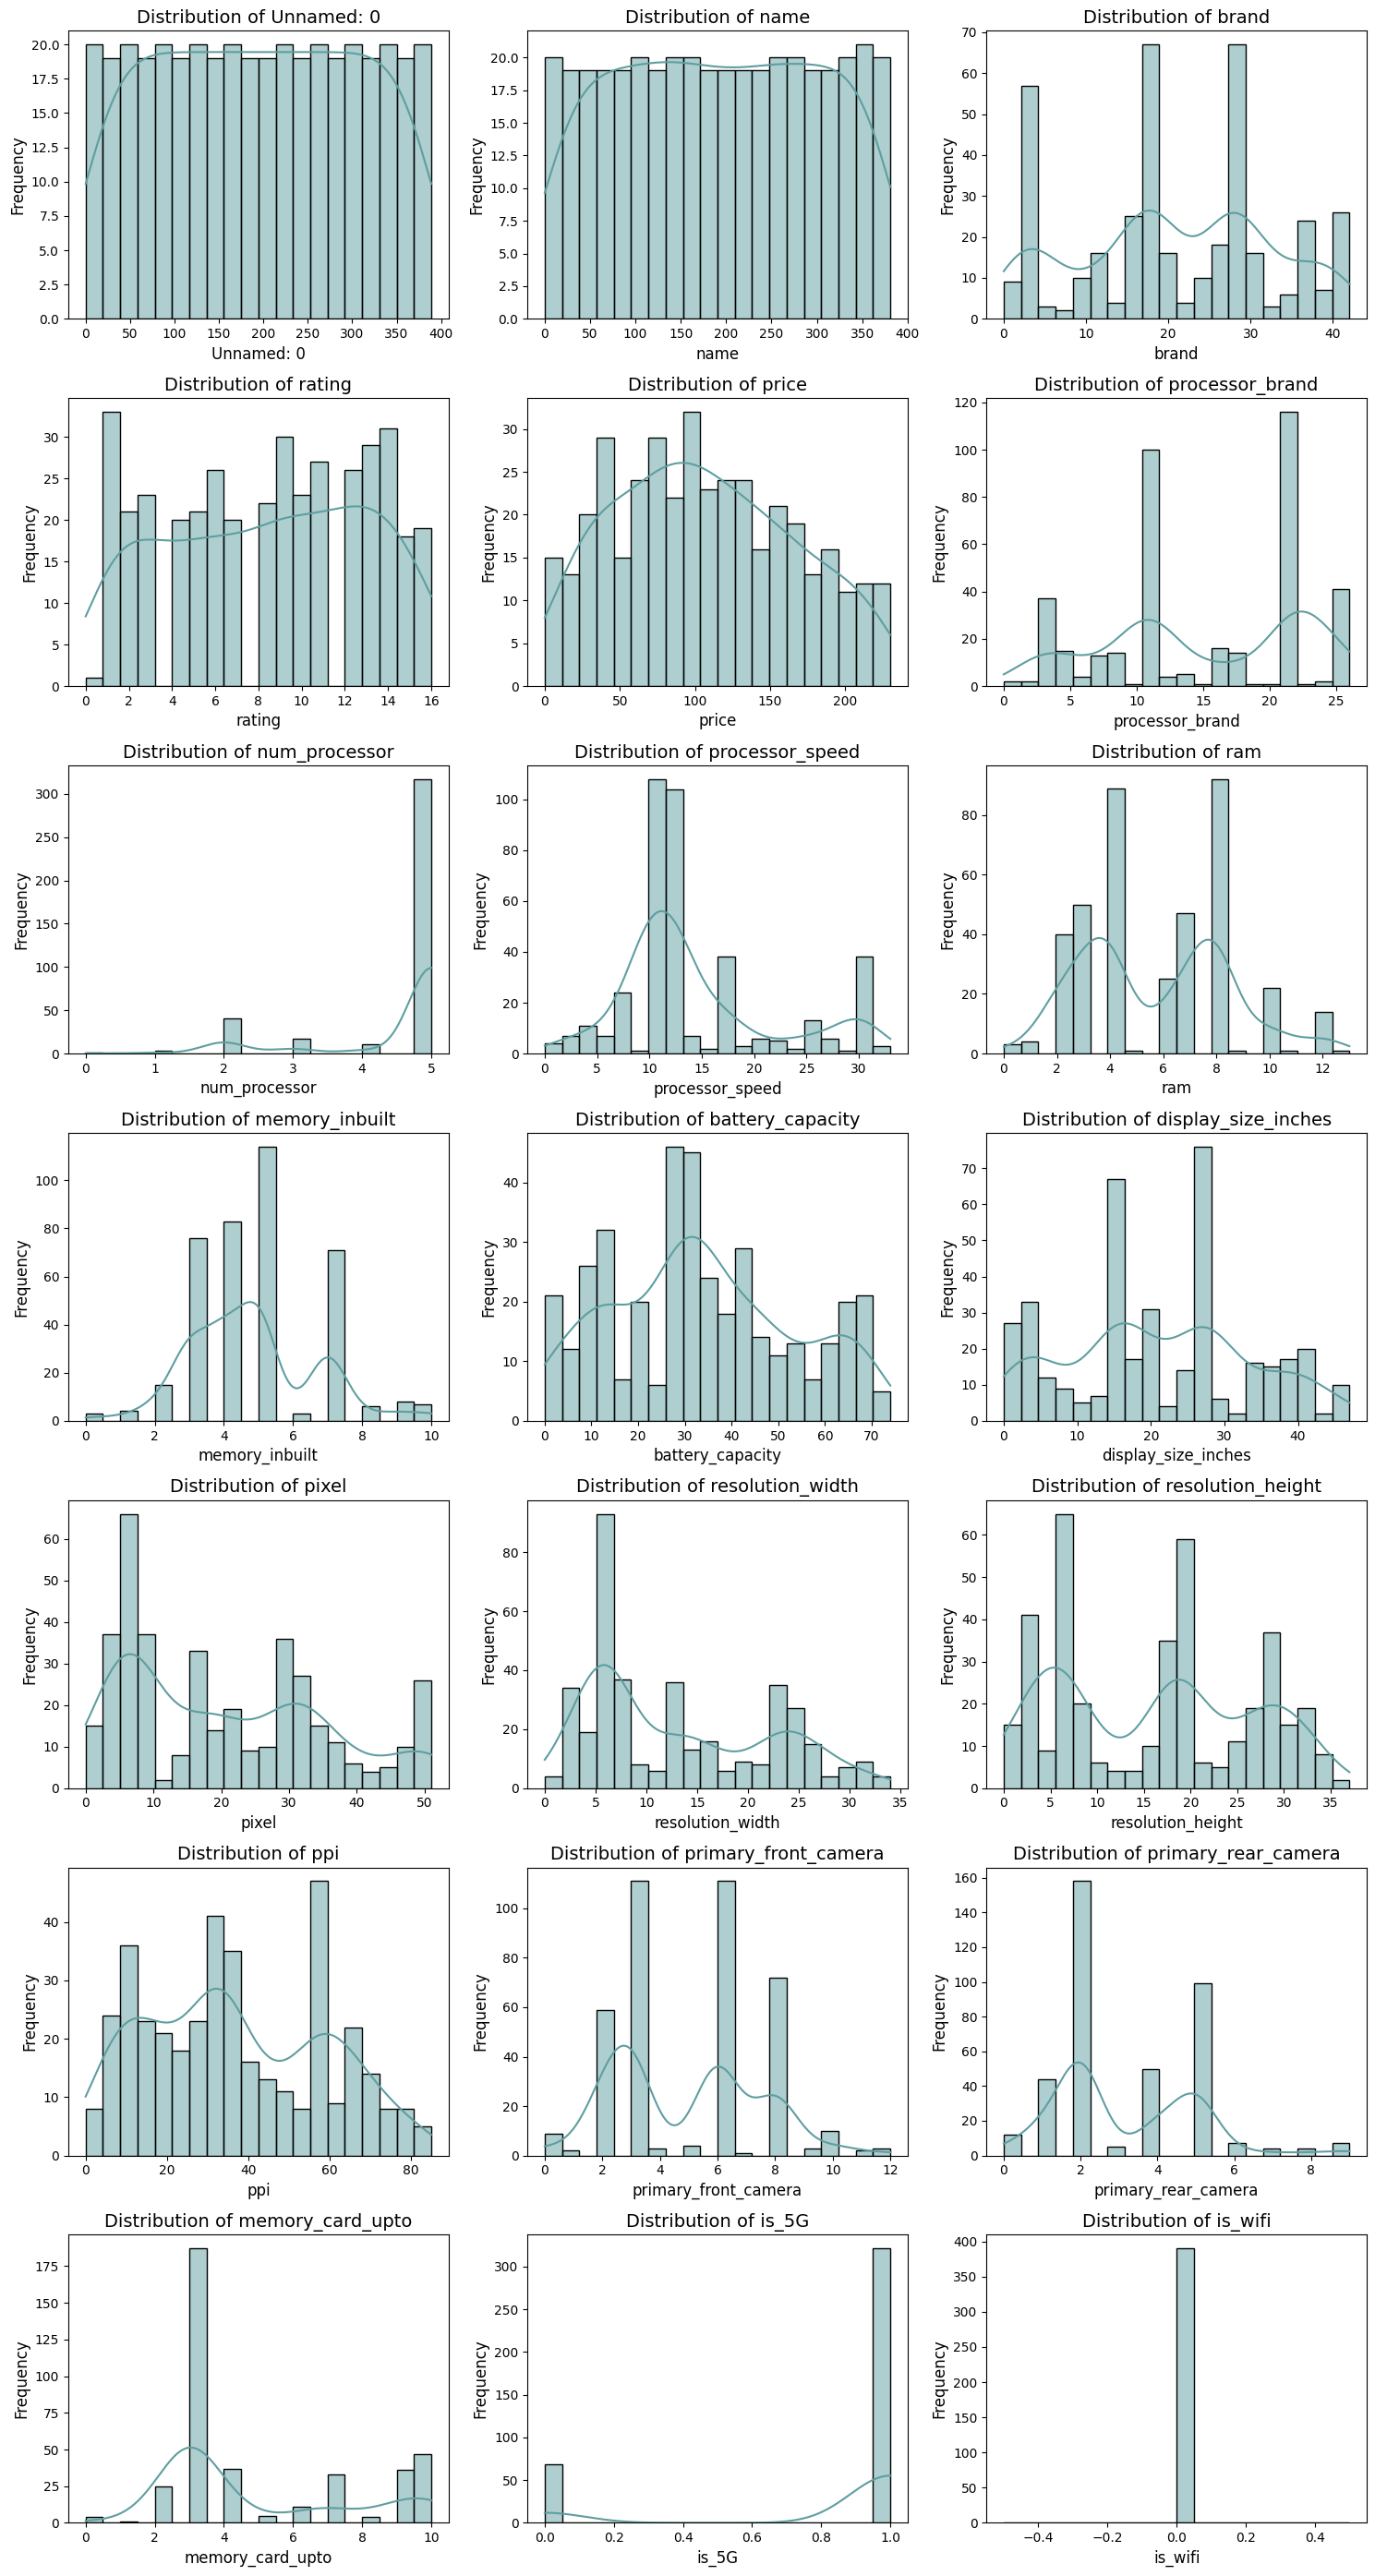

In [26]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=20, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel("Frequency", fontsize=12)
    axes[i].set_title(f"Distribution of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

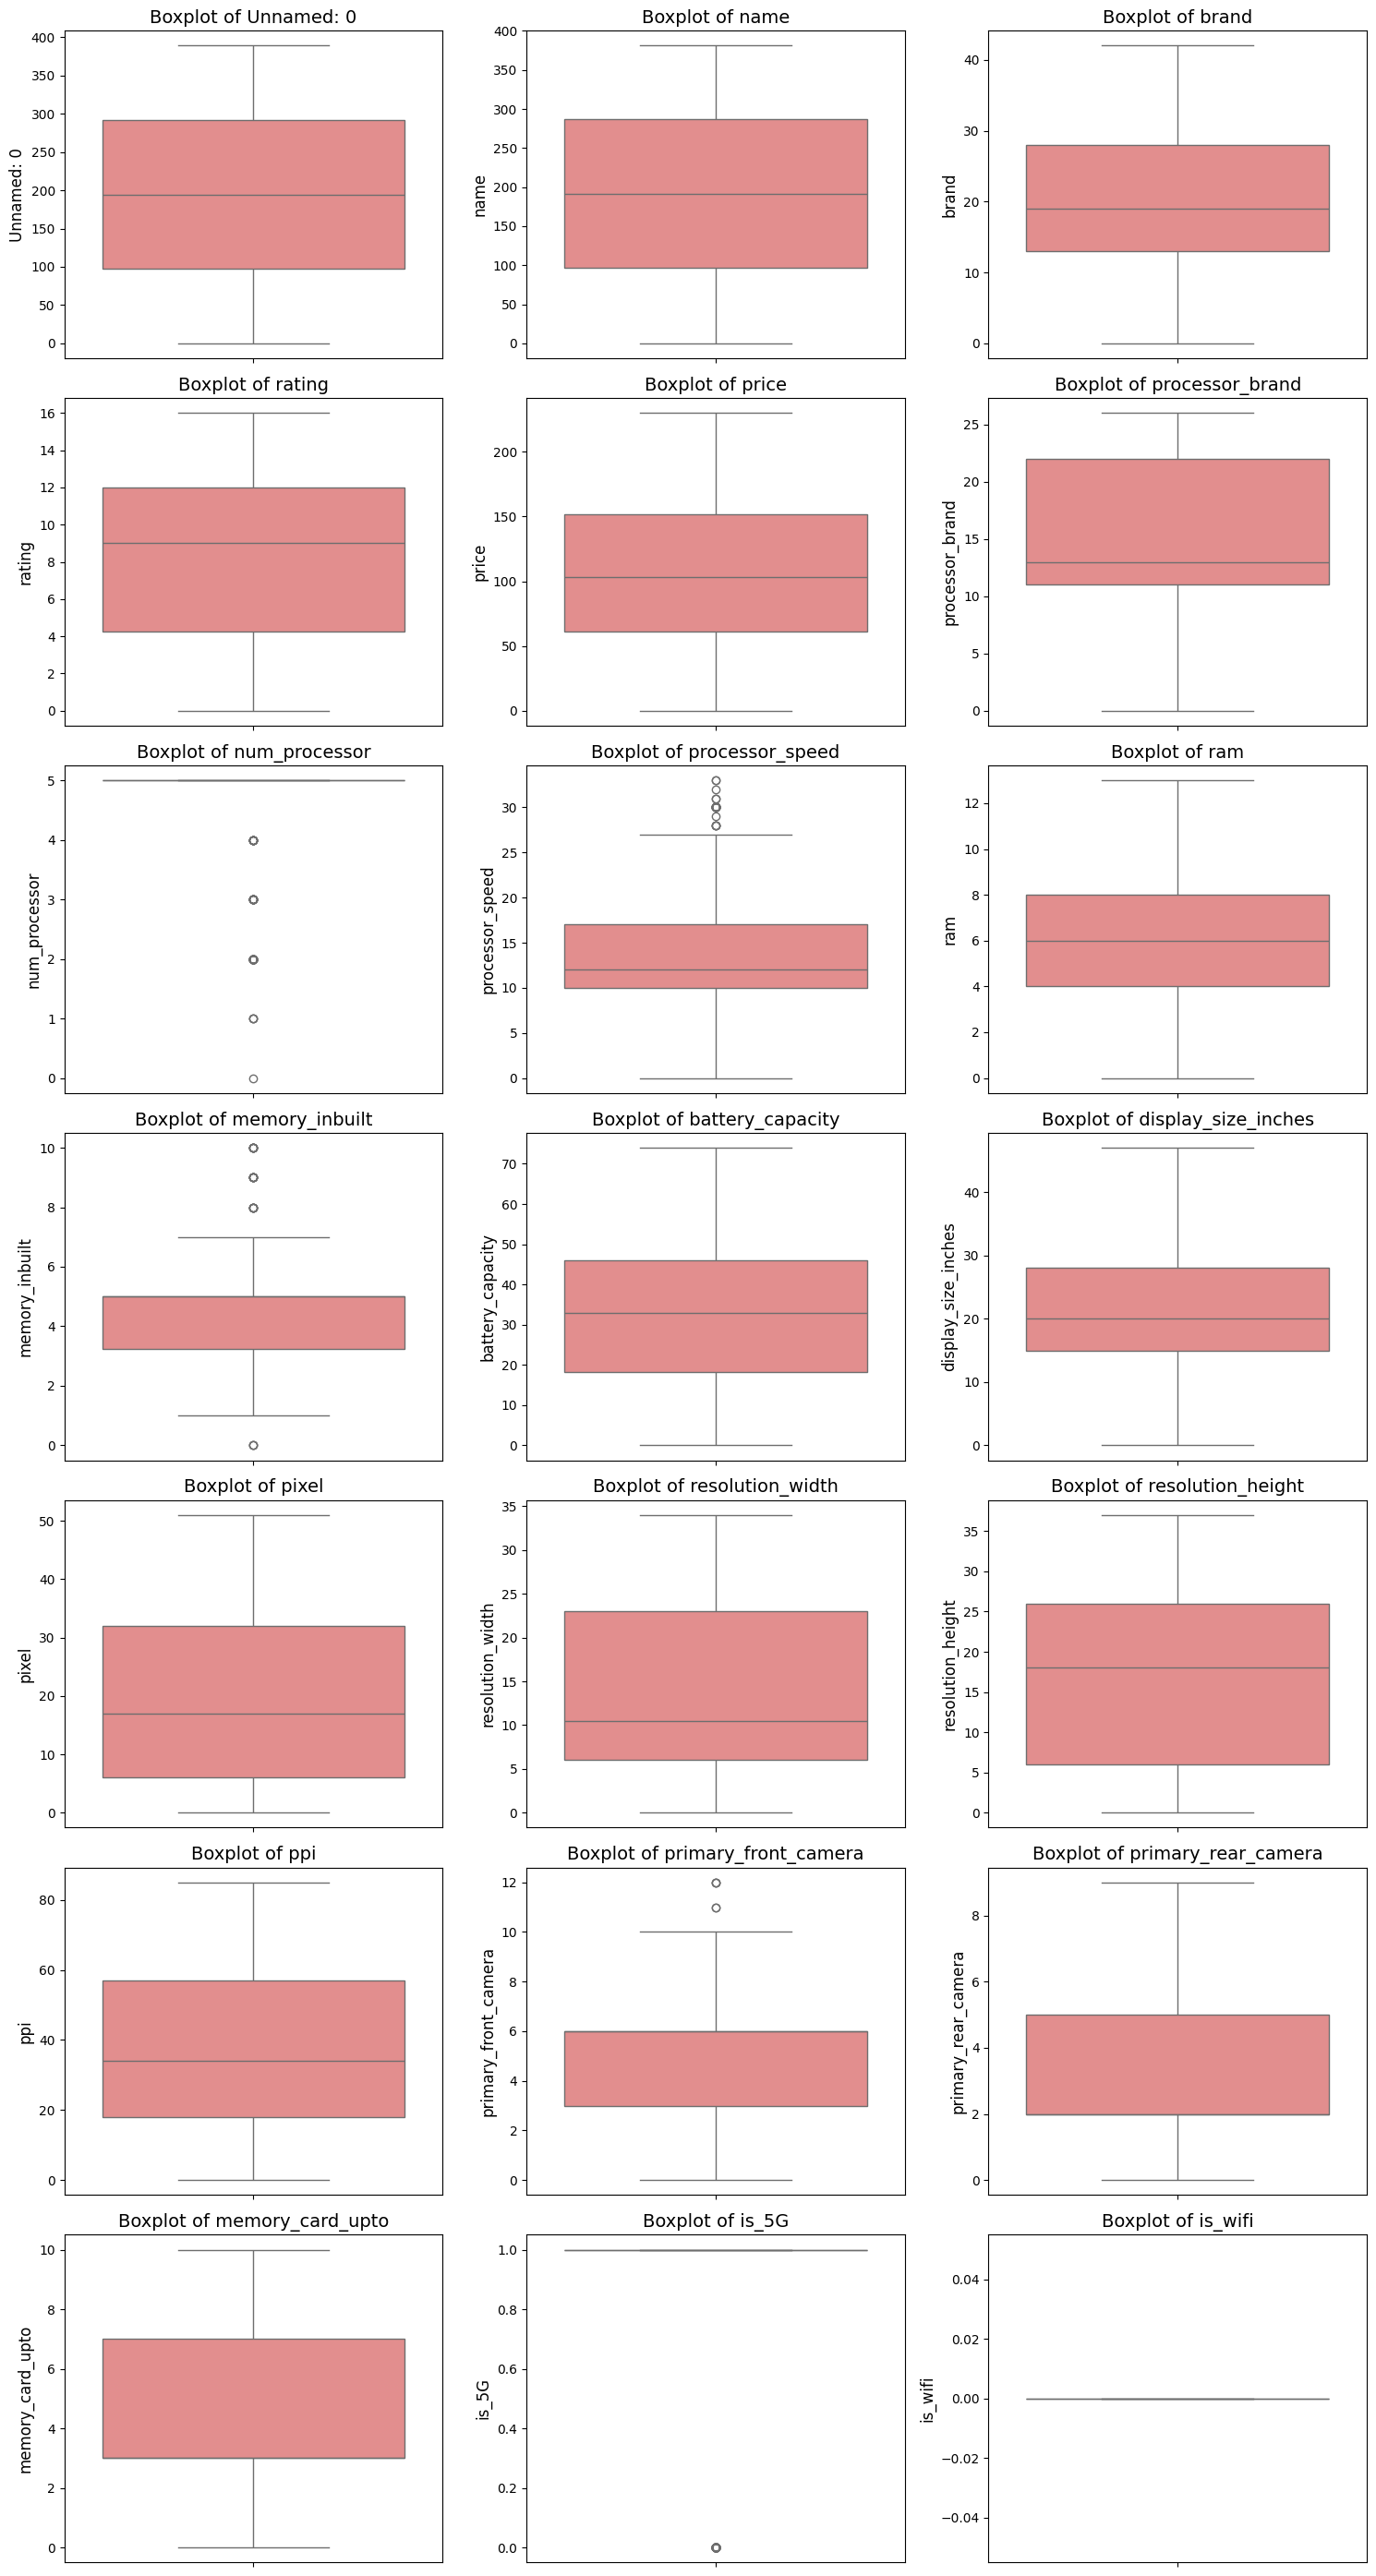

In [27]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

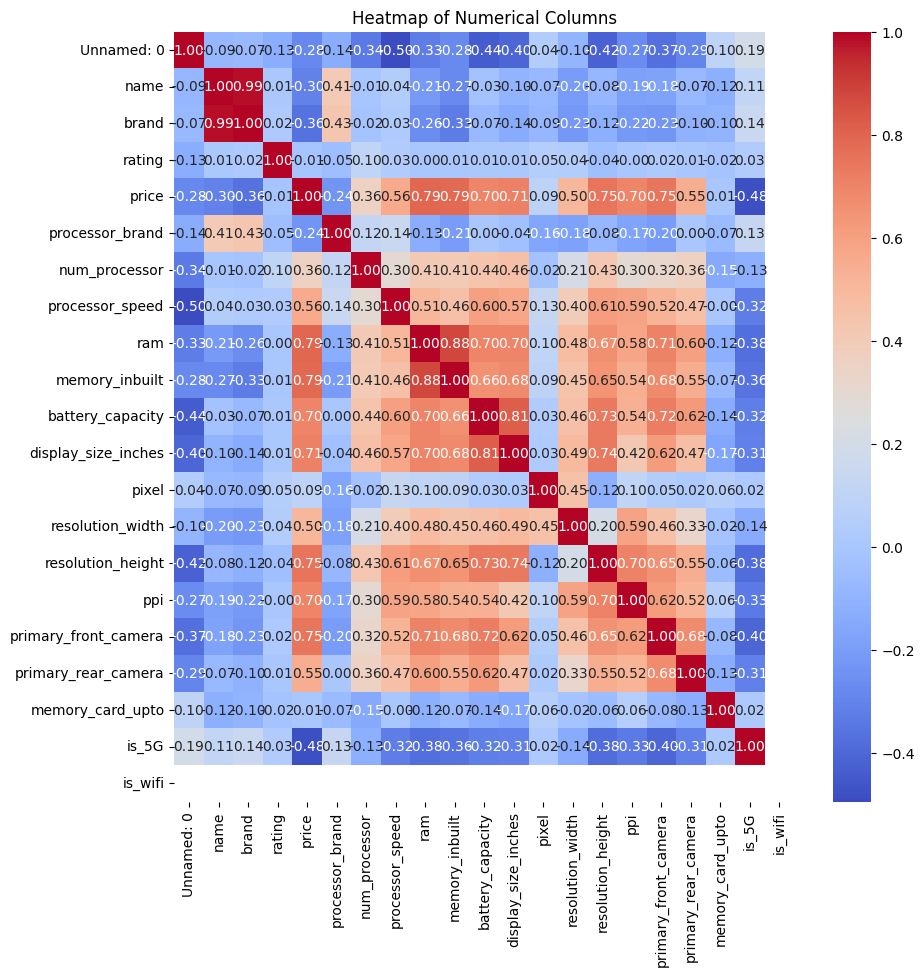

In [28]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 10))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [ ]:
# Dropping columns with more than 50% missing values

df.drop(columns=['charger', 'charging', 'frequency_display_hz', 'secondry_front_camera', 'secondry_rear_camera', 'os_brand', 'version', 'sim'], inplace=True)

In [19]:
# Filling missing values with mean for numeric columns and mode for non-numeric columns

df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col.fillna(col.mode()[0]) if col.isnull().any() else col)

In [20]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [21]:
X = df.drop(columns=['price'])
y = df['price']

In [22]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Building

In [23]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score

In [24]:
Linear_reg = LinearRegression()
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()
Decision_tree = DecisionTreeRegressor()
Svr = SVR()
Knn = KNeighborsRegressor()

In [25]:
model_li = [Ride_reg, XGBoost, Random_forest, Ada_boost, Grad_boost, Bagging, Decision_tree, Svr, Knn]

Score = []
for model in model_li:
    model.fit(X_train, y_train)
    Score.append(r2_score(y_test, model.predict(X_test)))

Score

[0.8199439994855972,
 0.883476972579956,
 0.8718018538023954,
 0.8334127725345731,
 0.8819768058193941,
 0.8574735715907702,
 0.7850591276703524,
 0.18494996463725089,
 0.6447832334771495]